# 1. Install Dependencies and Setup

In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


# 2. Load Data

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset', image_size=(45, 45))

Found 6400 files belonging to 4 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
#images array
batch[0].shape

(32, 45, 45, 3)

In [7]:
#labels array
batch[1]

array([3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 2, 0, 2, 2, 2, 3, 2, 3], dtype=int32)

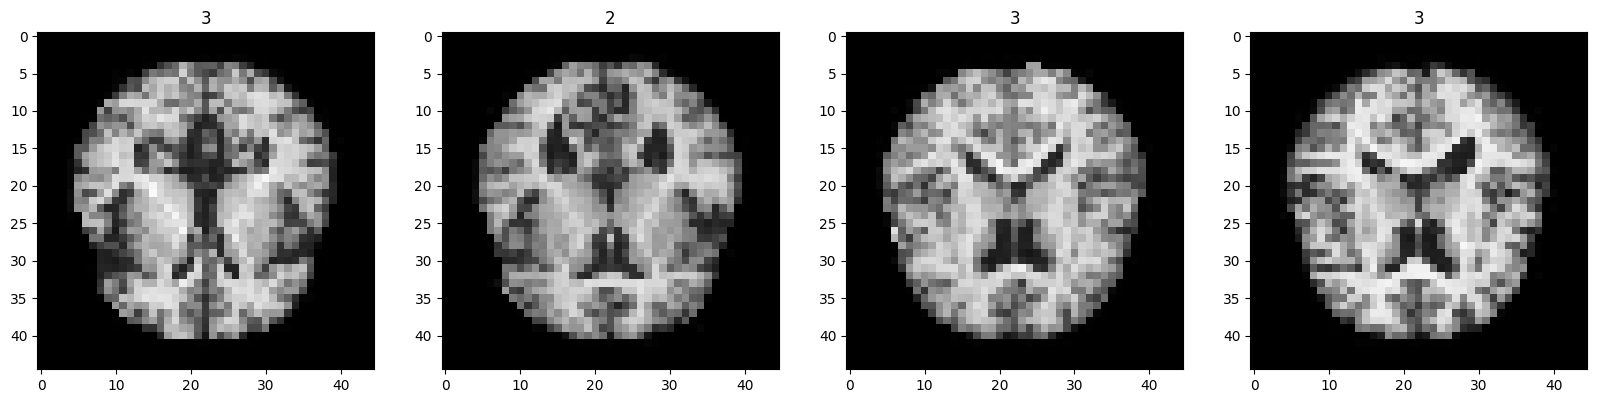

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Scale Data 

In [9]:
data = data.map(lambda x,y: (x/255, tf.keras.utils.to_categorical(y, 4)))

In [10]:
scaled_iterator = data.as_numpy_iterator()

In [11]:
batch = scaled_iterator.next()

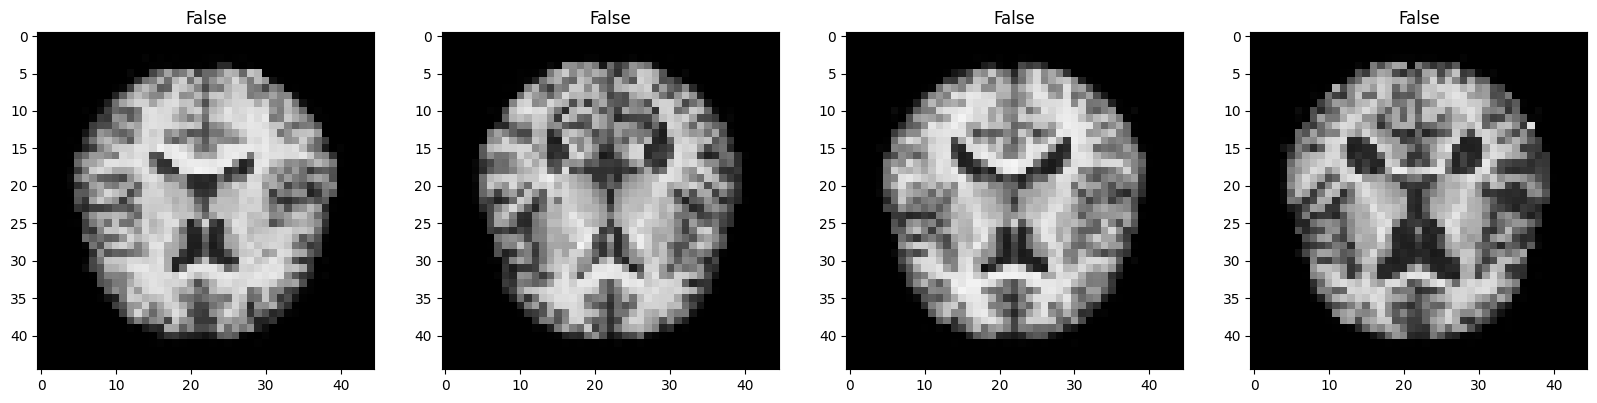

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx].all())

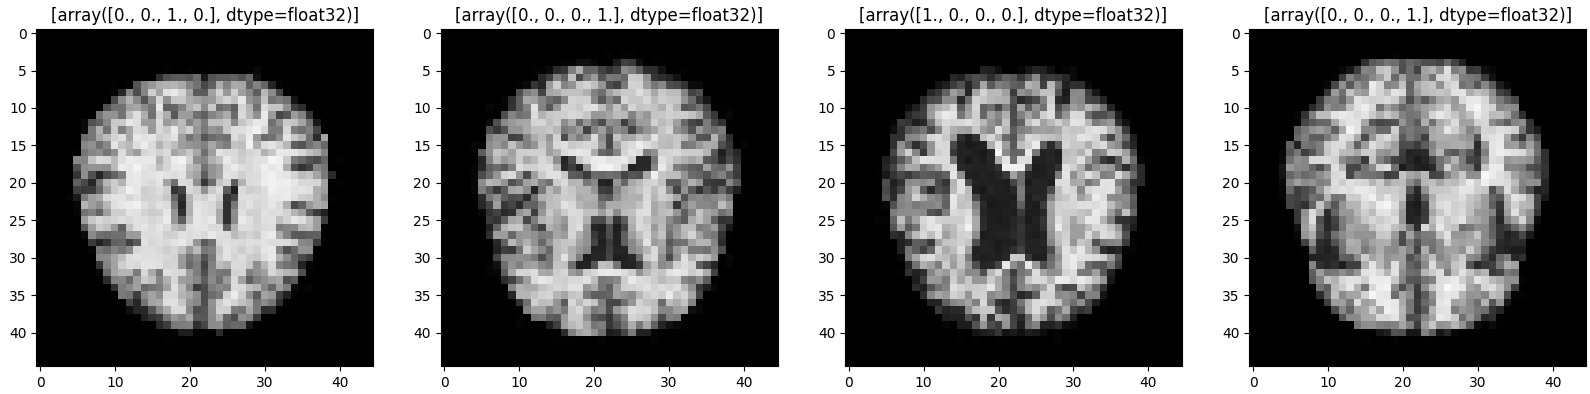

# 4. Split Data

In [13]:
len(data)

200

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
print(len(train))
print(len(val))
print(len(test))

140
40
20


# 5. Build Deep Learning Model

In [17]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(45, 45, 3)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())

model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(4, activation='softmax'))

model_cnn.compile(optimizer=tf.optimizers.Adadelta(), loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])

model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 43, 43, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,296,836 (12.58 MB)

 Trainable params: 3,296,836 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

# 6. Train Model

In [18]:
logdir='logs'

In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [20]:
hist=model_cnn.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - accuracy: 0.3831 - loss: 1.3237 - val_accuracy: 0.5086 - val_loss: 1.1212
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.4872 - loss: 1.1188 - val_accuracy: 0.5008 - val_loss: 1.0614
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 157ms/step - accuracy: 0.4956 - loss: 1.0668 - val_accuracy: 0.5016 - val_loss: 1.0365
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.4893 - loss: 1.0551 - val_accuracy: 0.4930 - val_loss: 1.0347
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.4964 - loss: 1.0491 - val_accuracy: 0.4977 - val_loss: 1.0319
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.4879 - loss: 1.0434 - val_accuracy: 0.5086 - val_loss: 1.0098
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 162ms/step - accuracy: 0.4986 - loss: 1.0408 - val_accuracy: 0.5125 - val_loss: 1.0029
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 41s 159ms/step - accuracy: 0.4937 -

# 7. Plot Performance

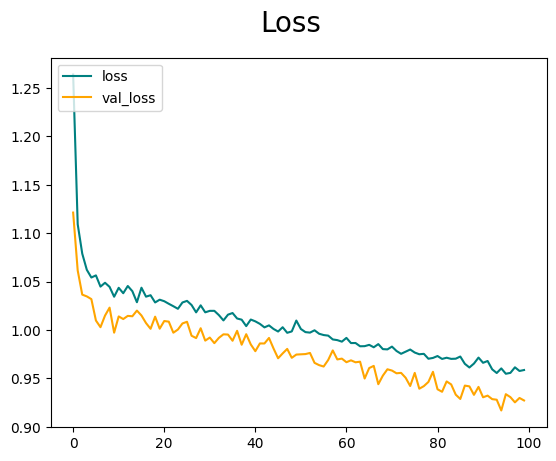

In [21]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show(block=False)()

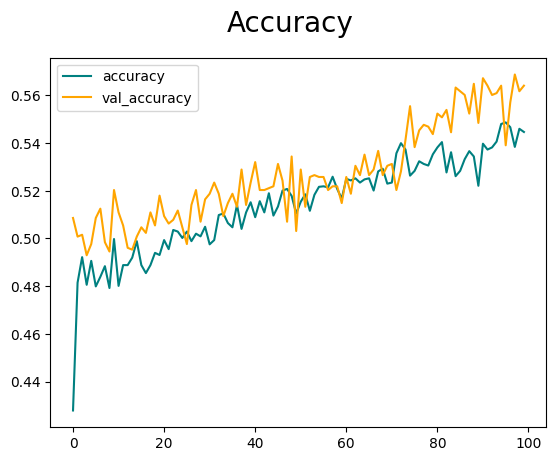

In [22]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show(block=False)()

# 8. Evaluate

In [23]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [24]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model_cnn.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [25]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7033639, shape=(), dtype=float32) tf.Tensor(0.359375, shape=(), dtype=float32) tf.Tensor(0.5390625, shape=(), dtype=float32)


# 9. Test

In [26]:
def pred_alza(img):
    resize = tf.image.resize(img, (45,45))
    yhat=model_cnn.predict(np.expand_dims(resize/255, 0))
    id_label = []
    for i in yhat[0]:
        if i < yhat[0].max():
            id_label.append(0)
        else:
            id_label.append(1)

    id_label = id_label
    name_label = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
    temp = list(zip(id_label, name_label))
    for i in range(len(temp)):
        if temp[i][0]==1:
            label = temp[i][1]

    return(label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


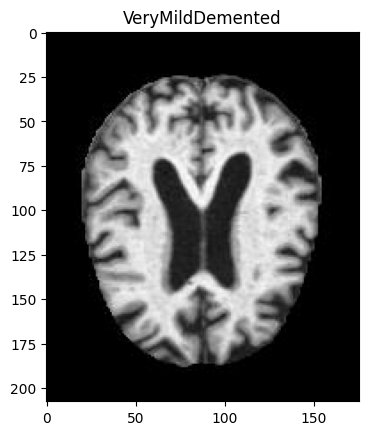

In [27]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/MildDemented/26 (19).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()

# 10. Transfer learning

In [28]:

import tensorflow as tf
from keras.applications import DenseNet201
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

base_model = tf.keras.applications.DenseNet201(
    weights='/kaggle/input/imageset/keras/default/1/densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5',  # Correct path to weights
    include_top=False, 
    input_shape=(45, 45, 3)
)



In [29]:
x = base_model.output

x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)  # Add your custom dense layers here

predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


In [30]:
# Compile the model
model.compile('adam', loss=tf.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 45, 45, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 51, 51, 3) │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 23, 23,    │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 23, 23,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 23, 23,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 25, 25,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 12, 12,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 12, 12,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 12, 12,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 12, 12,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 12, 12,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 12, 12,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 12, 12,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 12, 12,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 12, 12,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 12, 12,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 12, 12,    │     12,288 │ conv2_block2_0_r

 Total params: 20,293,188 (77.41 MB)

 Trainable params: 1,971,204 (7.52 MB)

 Non-trainable params: 18,321,984 (69.89 MB)

In [31]:
logdir='logs_resnet'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist_DenseNet=model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 81s 377ms/step - accuracy: 0.5025 - loss: 1.0759 - val_accuracy: 0.5945 - val_loss: 0.8945
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.5609 - loss: 0.9040 - val_accuracy: 0.5734 - val_loss: 0.8779
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.6013 - loss: 0.8582 - val_accuracy: 0.5609 - val_loss: 0.9524
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 82s 314ms/step - accuracy: 0.5926 - loss: 0.8536 - val_accuracy: 0.5953 - val_loss: 0.8457
Epoch 5/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 45s 323ms/step - accuracy: 0.6298 - loss: 0.8161 - val_accuracy: 0.5805 - val_loss: 0.8539
Epoch 6/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 313ms/step - accuracy: 0.6100 - loss: 0.8306 - val_accuracy: 0.6297 - val_loss: 0.8114
Epoch 7/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 44s 315ms/step - accuracy: 0.6332 - loss: 0.7817 - val_accuracy: 0.6016 - val_loss: 0.8150
Epoch 8/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 43s 308ms/step - accuracy: 0.6517 -

# 11. Plot Performance 

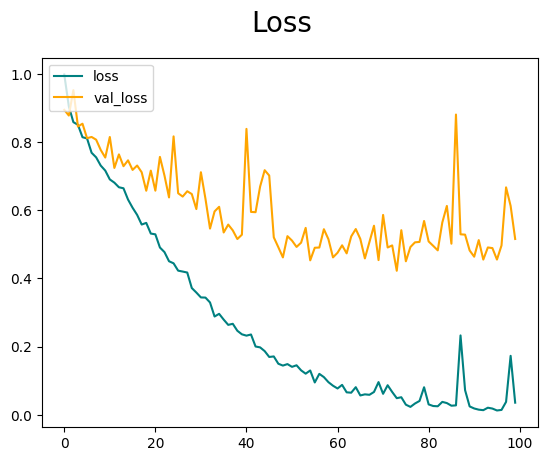

In [34]:
fig = plt.figure()
plt.plot(hist_DenseNet.history['loss'], color='teal', label='loss')
plt.plot(hist_DenseNet.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show(block=False)()

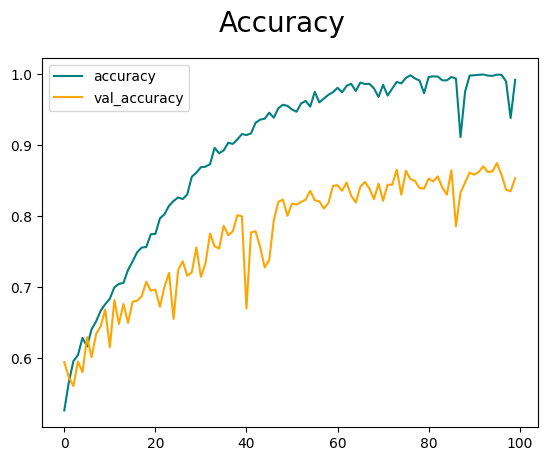

In [35]:
fig = plt.figure()
plt.plot(hist_DenseNet.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist_DenseNet.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show(block=False)()

# 12. Evaluate 

In [36]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.807571, shape=(), dtype=float32) tf.Tensor(0.8, shape=(), dtype=float32) tf.Tensor(0.80625, shape=(), dtype=float32)


# 13. Test 

In [39]:
def pred_alza(img):
    resize = tf.image.resize(img, (45,45))
    yhat=model.predict(np.expand_dims(resize/255, 0))
    id_label = []
    for i in yhat[0]:
        if i < yhat[0].max():
            id_label.append(0)
        else:
            id_label.append(1)

    id_label = id_label
    name_label = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
    temp = list(zip(id_label, name_label))
    for i in range(len(temp)):
        if temp[i][0]==1:
            label = temp[i][1]

    return(label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


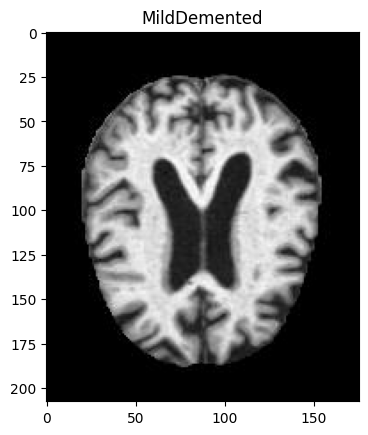

In [40]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/MildDemented/26 (19).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()

# 14. Save the Model

In [41]:
from tensorflow.keras.models import load_model
import os

#model.save(os.path.join('/','image_alz_classifier.h5'))

# 15. Load Model

In [42]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np

#new_model = load_model('image_alz_classifier.h5')

In [43]:
def pred_alza(img):
    resize = tf.image.resize(img, (45,45))
    yhat=model.predict(np.expand_dims(resize/255, 0))
    id_label = []
    for i in yhat[0]:
        if i < yhat[0].max():
            id_label.append(0)
        else:
            id_label.append(1)

    id_label = id_label
    name_label = ['MildDemented','ModerateDemented','NonDemented', 'VeryMildDemented']
    temp = list(zip(id_label, name_label))
    for i in range(len(temp)):
        if temp[i][0]==1:
            label = temp[i][1]

    return(label) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


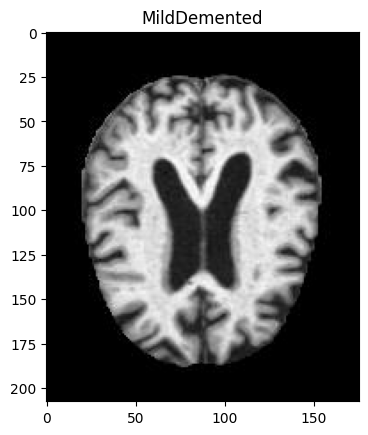

In [44]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/MildDemented/26 (19).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


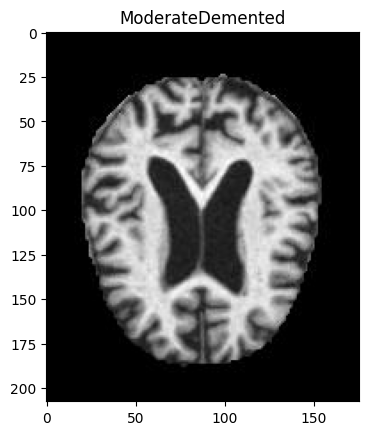

In [45]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/ModerateDemented/27 (2).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


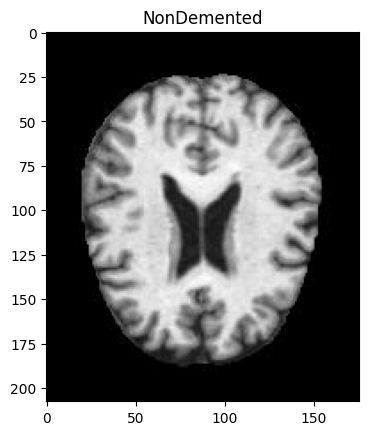

In [46]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/NonDemented/26 (62).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


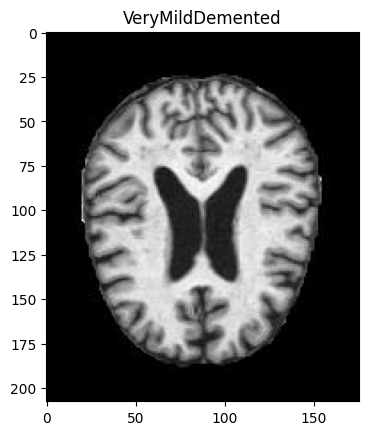

In [47]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/kaggle/input/augmented-alzheimer-mri-dataset/OriginalDataset/VeryMildDemented/26 (44).jpg')
label = pred_alza(img)
plt.imshow(img)
plt.title(label)
plt.show(block=False)()